In [1]:
from keras import models
from keras import layers
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [ ]:
model = models.Sequential()


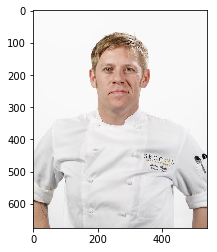

In [4]:
img = cv2.imread("course_images/rsz_jason.jpg")
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

In [87]:
img.shape

(675, 540, 3)

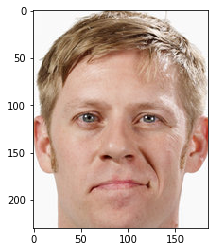

In [88]:
plt.imshow(cv2.cvtColor(img[70:300,175:360,:],cv2.COLOR_BGR2RGB))
img2 = img[70:300,175:360,:]

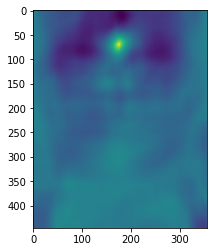

In [89]:
result = cv2.matchTemplate(img,img2,cv2.TM_CCORR_NORMED)
plt.imshow(result,);

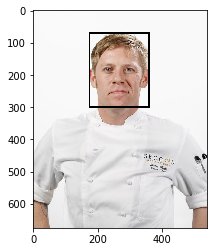

In [91]:
_,_,maxv,minv = cv2.minMaxLoc(result)
img_copy = img.copy()
cv2.rectangle(img_copy,minv,(minv[0] + img2.shape[1],minv[1] + img2.shape[0]),0,3)
plt.imshow(cv2.cvtColor(img_copy,cv2.COLOR_BGR2RGB))
plt.show()

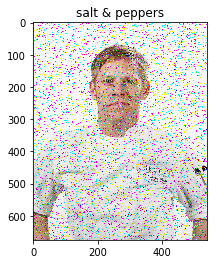

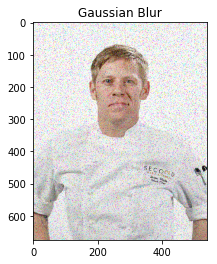

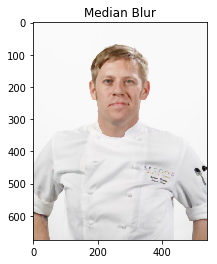

In [105]:
sp = img.copy()
rnd = np.random.rand(*img.shape) # uniforme [0,1]
sp[rnd > 0.95] = 255 # salt
sp[rnd < 0.05] = 0 # pepper
plt.imshow(cv2.cvtColor(sp,cv2.COLOR_BGR2RGB));plt.title('salt & peppers'); plt.show()


gausb = cv2.GaussianBlur(sp,(5,5),0)
plt.imshow(cv2.cvtColor(gausb,cv2.COLOR_BGR2RGB));plt.title('Gaussian Blur'); plt.show()
medianblur = cv2.medianBlur(sp,5,0)
plt.imshow(cv2.cvtColor(medianblur,cv2.COLOR_BGR2RGB));plt.title('Median Blur'); plt.show()


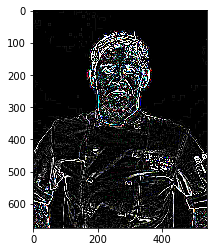

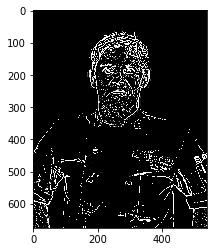

In [134]:
laplacian = cv2.Laplacian(img,cv2.CV_8U,ksize=5)
plt.imshow(cv2.cvtColor(laplacian,cv2.COLOR_BGR2RGB)); plt.show()
r,thresh = cv2.threshold(laplacian,150,255,cv2.THRESH_BINARY)
plt.imshow(cv2.cvtColor(thresh,cv2.COLOR_BGR2GRAY),'gray'); plt.show()
